In [1]:
import os
import itertools
import numpy as np
import pandas as pd
# PyTorch
import torch
import torchvision
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import ScalarFormatter
plt.rcParams.update({'font.size': 12})

In [2]:
import sys
sys.path.append('../src/')

%load_ext autoreload
%autoreload 2
# Importing our custom module(s)
import utils as utils
import losses

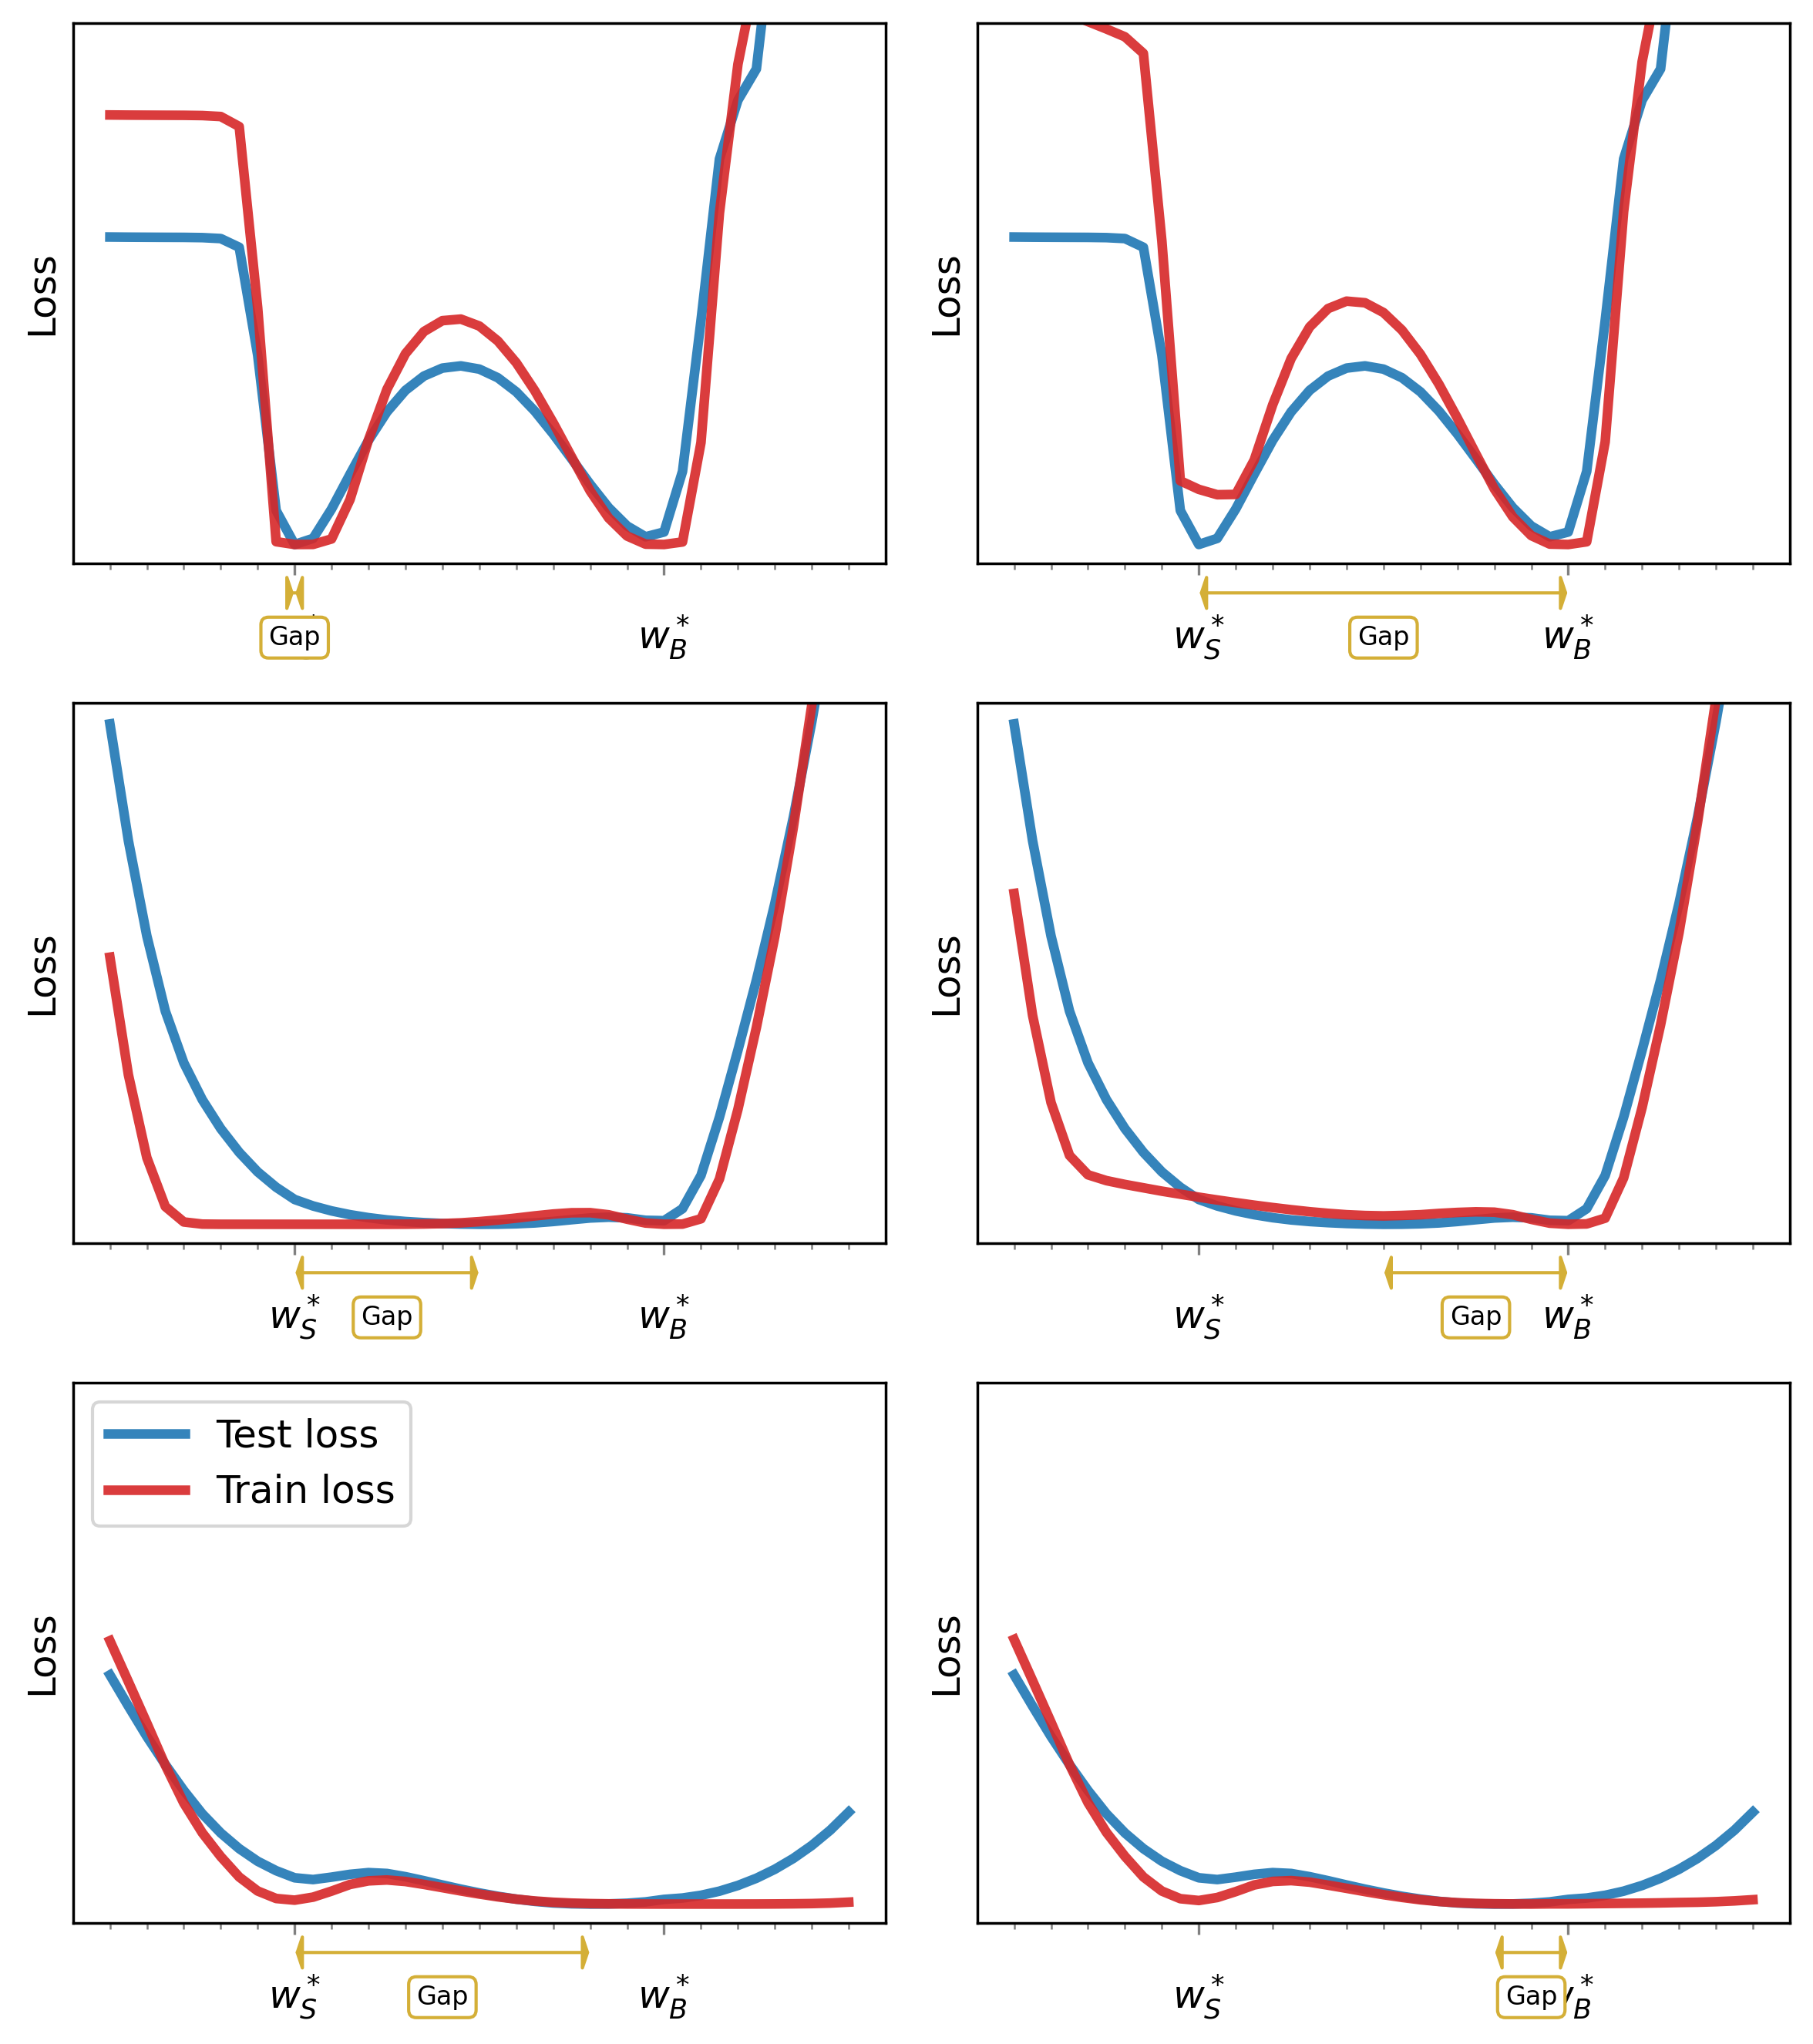

In [3]:
def color_ax(ax, color='gray'):
    ax.spines['bottom'].set_color(color)
    ax.spines['top'].set_color(color)
    ax.spines['left'].set_color(color)
    ax.spines['right'].set_color(color)
    ax.tick_params(which='both', color=color)
    
ncols, nrows = 2, 3
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols, 3*nrows), dpi=300)

for index, (random_state, train_label, test_label) in enumerate(zip([3001, 2001, 1001], ['Train loss', None, None], ['Test loss', None, None])):
    
    nonlearned_train_losses = torch.load('./nonlearned_train_interpolation_random_state={}.pth'.format(random_state))
    nonlearned_test_losses = torch.load('./nonlearned_test_interpolation_random_state={}.pth'.format(random_state))
    learned_train_losses = torch.load('./learned_train_interpolation_random_state={}.pth'.format(random_state))
    learned_test_losses = torch.load('./learned_test_interpolation_random_state={}.pth'.format(random_state))

    test_lower_bound = min(min(nonlearned_test_losses), min(learned_test_losses))-0.1
    test_upper_bound = test_lower_bound+2.9
    nonlearned_train_lower_bound = min(nonlearned_train_losses)-0.1
    nonlearned_train_upper_bound = nonlearned_train_lower_bound+2.9
    learned_train_lower_bound = min(learned_train_losses)-0.1
    learned_train_upper_bound = learned_train_lower_bound+2.9
    
    start, end = 10, 30

    axs[index,0].plot(range(len(nonlearned_test_losses)), nonlearned_test_losses, alpha=0.9, color='#1f77b4', label=test_label, linewidth=3)
    # Ticks
    axs[index,0].set_xticks([10, 30])
    axs[index,0].set_xticks(np.linspace(0, 40, num=21), minor=True)
    axs[index,0].set_xticklabels([r'$w_{S}^*$', r'$w_{B}^*$'])
    color_ax(axs[index,0])
    axs[index,0].tick_params(axis='x', which='both', pad=12)
    axs[index,0].annotate('', xy=(start-0.4, test_lower_bound-0.16), xycoords='data', textcoords='data', xytext=(np.argmin(nonlearned_test_losses)+0.4, test_lower_bound-0.16), arrowprops=dict(arrowstyle="<|-|>", color='#d4af37', mutation_scale=4, mutation_aspect=6), annotation_clip=False)
    axs[index,0].annotate('Gap', xy=((start+np.argmin(nonlearned_test_losses))/2, test_lower_bound-0.4), annotation_clip=False, ha='center', va='center', fontsize=8, color='black', bbox=dict(facecolor='white', edgecolor='#d4af37', boxstyle='round,pad=0.3'))
    axs[index,0].set_ylim([test_lower_bound, test_upper_bound])
    axs[index,0].set_yticks([])
    axs[index,0].set_ylabel('Loss')

    twin_axs0 = axs[index,0].twinx()
    twin_axs0.plot(range(len(nonlearned_train_losses)), nonlearned_train_losses, alpha=0.9, color='#d62728', label=train_label, linewidth=3)
    twin_axs0.set_ylim([nonlearned_train_lower_bound, nonlearned_train_upper_bound])
    twin_axs0.set_yticks([])

    axs[index,1].plot(range(len(learned_test_losses)), learned_test_losses, alpha=0.9, color='#1f77b4', linewidth=3)
    # Ticks
    axs[index,1].set_xticks([10, 30])
    axs[index,1].set_xticks(np.linspace(0, 40, num=21), minor=True)
    axs[index,1].set_xticklabels([r'$w_{S}^*$', r'$w_{B}^*$'])
    color_ax(axs[index,1])
    axs[index,1].tick_params(axis='x', which='both', pad=12)
    axs[index,1].annotate('', xy=(end+0.4, test_lower_bound-0.16), xycoords='data', textcoords='data', xytext=(np.argmin(nonlearned_test_losses)-0.4, test_lower_bound-0.16), arrowprops=dict(arrowstyle="<|-|>", color='#d4af37', mutation_scale=4, mutation_aspect=6), annotation_clip=False)
    axs[index,1].annotate('Gap', xy=((end+np.argmin(nonlearned_test_losses))/2, test_lower_bound-0.4), annotation_clip=False, ha='center', va='center', fontsize=8, color='black', bbox=dict(facecolor='white', edgecolor='#d4af37', boxstyle='round,pad=0.3'))
    axs[index,1].set_ylim([test_lower_bound, test_upper_bound])
    axs[index,1].set_yticks([])
    axs[index,1].set_ylabel('Loss')

    twin_axs1 = axs[index,1].twinx()
    twin_axs1.plot(range(len(learned_train_losses)), learned_train_losses, alpha=0.9, color='#d62728', linewidth=3)
    twin_axs1.set_ylim([learned_train_lower_bound, learned_train_upper_bound])
    twin_axs1.set_yticks([])
    
fig.legend(loc='upper left', bbox_to_anchor=(0,1), bbox_transform=axs[-1,0].transAxes)
fig.tight_layout()    
plt.savefig('interpolations.pdf')
plt.show()